# Sentiment Analysis & Opinion Minion

Analysis tweets related to a particular topic and obtaining essential insights from it.

In [0]:
#!pip install tweepy
#!pip install vaderSentiment

In [0]:
import pandas as pd
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [0]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

### Authentication with Twitter account using tweepy

In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

### Cleaning function for tweets

In [0]:
import re
def clean_text(doc):
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|(^ 0-9A-Za-z \t)|(\w+:\/\/\S+)", " ", doc).split())

### Defining the lexicon based sentiment analyser

In [19]:
import nltk
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Categorize the sentiment scores into classes

In [0]:
# Refer : https://github.com/cjhutto/vaderSentiment#about-the-scoring

def categorize(score):
  if(score['compound']>=0.05):
    return 'Positive'
  elif(score['compound']<=-0.05):
    return 'Negative'
  else:
    return 'Neutral'

### Fetching the top 10 trends from Twitter, for India only

In [0]:
top_ten_trends_india = api.trends_place(23424848)[0]['trends'][:10]

In [0]:
top_trends = [i['name'] for i in top_ten_trends_india]

### Wrapper module for entire process and pie-chart

In [0]:
def visualise(trend):
  tweets = api.search(trend, count = 200)
  df = pd.DataFrame(data=[categorize(vader.polarity_scores(clean_text(tweet.text))) for tweet in tweets], columns=['Polarity'])
  df.Polarity.value_counts().plot.pie(autopct='%.2f')
  plt.title(trend)
  plt.show()

### Showing top trends and their sentiment distributions

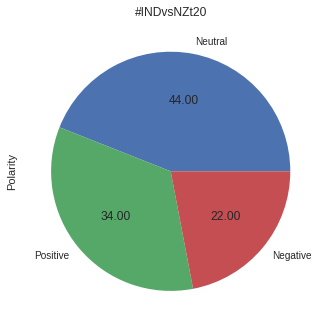

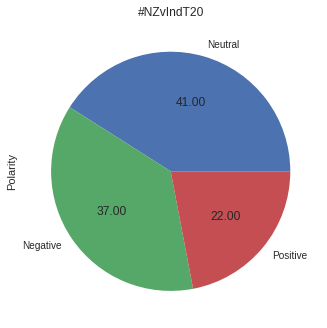

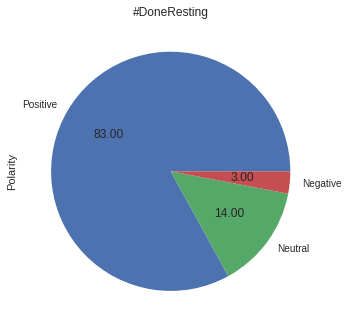

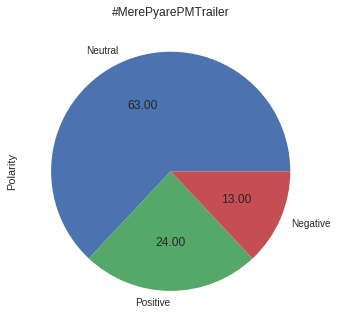

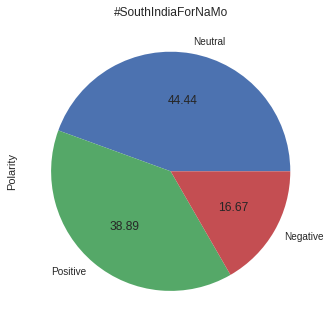

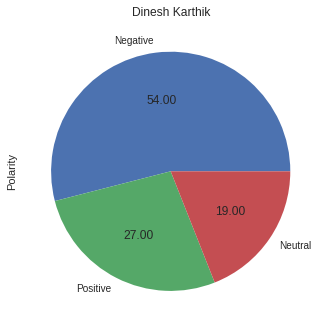

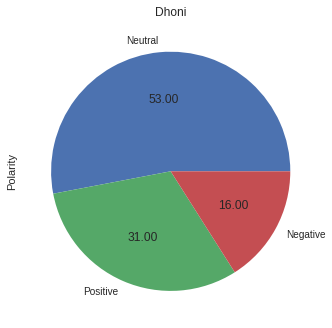

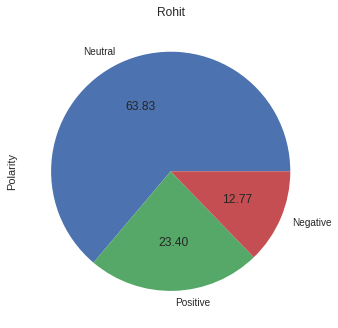

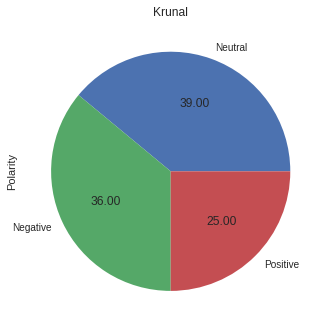

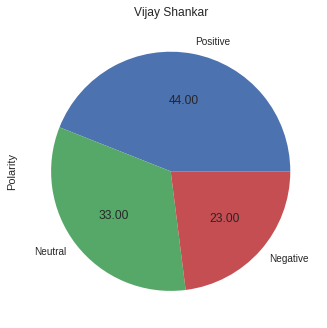

In [24]:
for i in top_trends:
  visualise(i)

## Conclusion

- Thus, we can easily analyse the top twitter trends and their sentiments. 
- We can also analyse custom trends by passing the search string through the `visualise()` method. 
- Note that, this is a lexicon based approach. 
- The entire notebook is open sourced. It is open to collaborations and improvements. Feel free to add comments and PRs.
- I am planning to develop a web-application for using this real-time. Will inform when done. :-)
- Feel free to connect with me on [LinkedIn](https://linkedin.com/in/amitrajitbose) and [Twitter](https://twitter.com/AmitrajitBose).